In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
# function to create density maps for images
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [3]:
#set the root to the Shanghai dataset you download
root = '/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_train,part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:

for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_54.jpg
(564, 832)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_11.jpg
(686, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_294.jpg
(683, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_59.jpg
(686, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_255.jpg
(701, 749)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_7.jpg
(590, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_210.jpg
(768, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/pa

generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_250.jpg
(681, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_285.jpg
(694, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_238.jpg
(469, 709)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_42.jpg
(667, 1000)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_25.jpg
(768, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_240.jpg
(183, 464)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_244.jpg
(342, 608)
generate density...
done.
/home/alienhawk/crowd/code_base/CS

done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_152.jpg
(600, 800)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_202.jpg
(530, 800)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_65.jpg
(683, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_221.jpg
(679, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_22.jpg
(630, 961)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_15.jpg
(768, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_78.jpg
(768, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiT

done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_24.jpg
(769, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_102.jpg
(768, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_81.jpg
(282, 377)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_140.jpg
(768, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_275.jpg
(270, 360)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_219.jpg
(282, 432)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_274.jpg
(681, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/Shangha

done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_108.jpg
(767, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_141.jpg
(427, 640)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_69.jpg
(596, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_93.jpg
(351, 620)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_47.jpg
(662, 962)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_151.jpg
(449, 716)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/train_data/images/IMG_125.jpg
(565, 849)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTe

done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_169.jpg
(683, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_182.jpg
(688, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_35.jpg
(534, 832)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_174.jpg
(768, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_92.jpg
(540, 833)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_1.jpg
(704, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_171.jpg
(687, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/pa

(448, 640)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_61.jpg
(398, 598)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_67.jpg
(600, 800)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_44.jpg
(767, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_99.jpg
(480, 640)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_97.jpg
(669, 1000)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_152.jpg
(709, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_65.jpg
(400, 682)
generate density...
done.
/home/alienhawk/crowd/code_base/CSR

done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_10.jpg
(768, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_77.jpg
(768, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_135.jpg
(224, 400)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_60.jpg
(599, 900)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_136.jpg
(224, 400)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_179.jpg
(683, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/part_A/test_data/images/IMG_71.jpg
(763, 1024)
generate density...
done.
/home/alienhawk/crowd/code_base/CSRNet-pytorch/ShanghaiTech/par

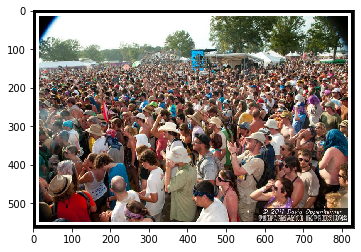

In [7]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[0]))

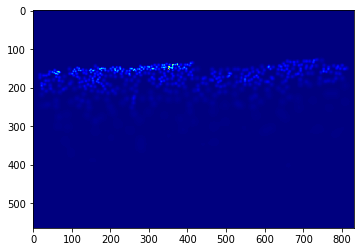

In [9]:


gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground-truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [10]:
np.sum(groundtruth)# don't mind this slight variation

506.1877

In [ ]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print img_path
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k